<h3>Signal Conditioning using Op Amp Example</h3>
<p />Suppose we want to design a level shifter circuit shown in Figure 1, 
as a frontend for a DC motor drive. The
input to this circuit has voltage range $\pm 10$ volts, and the output has range 0 - 3.3 volts 
suitable to feed into an ADC input of MCU.
So the mapping is

| Input | Output |
| --- | --- |
| 10 V | 3.3 V |
| 0 V | 1.65 V |
| -10V | 0 V |


!["fig 1"](https://raw.githubusercontent.com/dewdotninja/sharing-github/master/iaiiot/ex3_2_fig.png)

<b>Figure 1 Level shifter circuit</b>
<p />Our job is to select the values for $R_1 – R_4$, and $V_B$ appropriately. 

<h3>Solution</h3>
<p />The superposition principle is used in the design. Let $V_{in} = 0$ for the moment. We
want to create the 1.65 V DC bias that the AC command signal will ride on. This can be done by
selecting 
$$
R1 = R2 
$$
and 
$$
V_B = -1.65 V
$$
Now, we want to make the AC output part of the op-amp
swing within $\pm 1.65$ V range. Observe that with $V_B = 0, R1 = R2$ yields the non-inverting 
gain of 2. So the signal at non-inverting pin must equal $\pm 0.825$ V. Using the voltage divider 
formula, we have

$$
\frac{R_4}{R_3 + R_4}(10) = 0.825
$$

Hence,

$$
R_3 = 11.12R_4
$$

<p />Verify your design in the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def level_shifter_verify(R1,R2,R3,R4,Vb, Vi_min, Vi_max):
    tvec = np.arange(0,1,0.001)
    w = 10
    Vi_avg = 0.5*(Vi_max + Vi_min)
    Vi_peak = Vi_max - Vi_avg
    Vi = Vi_peak*np.sin(w*tvec)+Vi_avg # create sin-wave input
    Vi_min_txt = "min={:.2f} Volts".format(Vi_min)
    Vi_max_txt = "max={:.2f} Volts".format(Vi_max)

    rho = R4/(R3+R4)
    k = R2/R1

    Vo = rho*(1+k)*Vi - k*Vb
    Vo_max = max(Vo)
    Vo_min = min(Vo)
    Vo_min_txt = "min={:.2f} Volts".format(Vo_min)
    Vo_max_txt = "max={:.2f} Volts".format(Vo_max)

    fig, (ax1, ax2) = plt.subplots(2,figsize=(8,8))
    fig.suptitle('Level shifter design verification')
    ax1.plot(tvec,Vi,'b-')
    ax1.grid(True)
    ax1.set_ylabel('$V_{in}(t)$')
    ax1.text(0.52,Vi_min,Vi_min_txt)
    ax1.text(0.2,Vi_max,Vi_max_txt)
    
    ax2.plot(tvec,Vo,'r-')
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel('$V_{out}(t)$')
    ax2.grid(True)
    ax2.text(0.52,Vo_min,Vo_min_txt)
    ax2.text(0.2,Vo_max,Vo_max_txt)


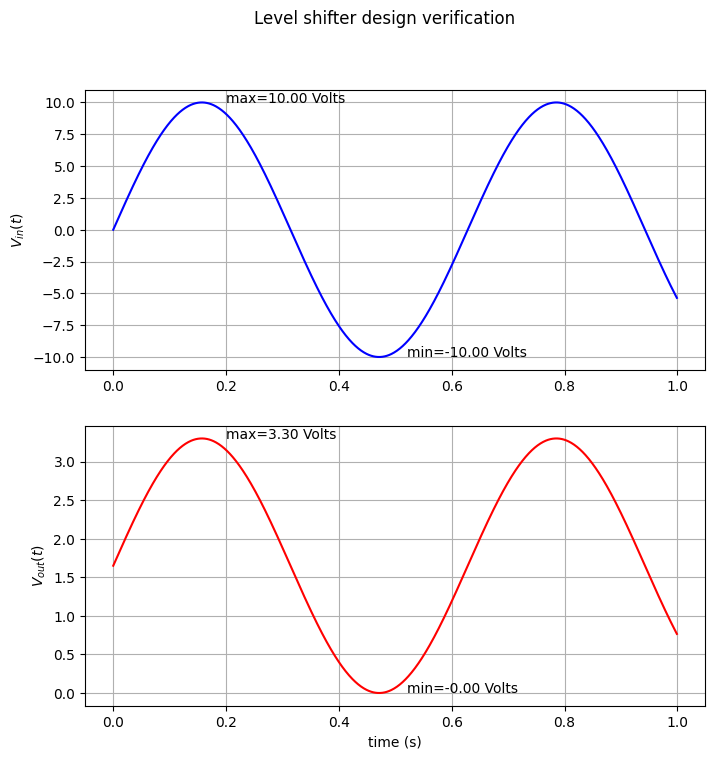

In [3]:
Vb = -1.65
R1 = 10000;
R2 = 10000;
R4 = 10000;
R3 = 11.12*R4;
Vi_min = -10
Vi_max = 10

level_shifter_verify(R1,R2,R3,R4,Vb, Vi_min, Vi_max)